In [1]:
import sys
import os
sys.path.append(os.path.abspath("Pytorch/"))
sys.path.append(os.path.abspath("models/"))

In [2]:
from FBSNNs import *
from ForwardContracts import *

In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 64  # number of trajectories (batch size)
N = 100 # number of time snapshots
D = 2 # number of dimensions
Mm = N ** (1/10)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([0.5] * D)[None, :]
T = 1.0

"Available architectures"
mode = "NAIS-Net"  # FC, Resnet and NAIS-Net are available
activation = "Sine"  # Sine and ReLU are available
model = ForwardContracts(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2*10**4
lr = 1e-3

In [6]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 0, Loss: 1.152e+02, Y0: -0.354, Time: 0.01, Learning Rate: 1.000e-03
It: 100, Loss: 1.403e-03, Y0: 0.003, Time: 0.70, Learning Rate: 1.000e-03
It: 200, Loss: 4.401e-04, Y0: -0.000, Time: 0.71, Learning Rate: 1.000e-03
It: 300, Loss: 5.073e-04, Y0: -0.000, Time: 0.67, Learning Rate: 1.000e-03
It: 400, Loss: 3.885e-04, Y0: 0.000, Time: 0.71, Learning Rate: 1.000e-03
It: 500, Loss: 7.990e-04, Y0: 0.001, Time: 0.71, Learning Rate: 1.000e-03
It: 600, Loss: 4.136e-04, Y0: 0.000, Time: 0.71, Learning Rate: 1.000e-03
It: 700, Loss: 3.512e-04, Y0: -0.001, Time: 0.70, Learning Rate: 1.000e-03
It: 800, Loss: 3.922e-04, Y0: 0.000, Time: 0.66, Learning Rate: 1.000e-03
It: 900, Loss: 2.142e-04, Y0: -0.000, Time: 0.74, Learning Rate: 1.000e-03
It: 1000, Loss: 1.889e-04, Y0: 0.000, Time: 0.71, Learning Rate: 1.000e-03
It: 1100, Loss: 6.408e-01, Y0: 0.092, Time: 0.68, Learning Rate: 1.000e-03
It: 1200, Loss: 2.543e-04, Y0: 0.001, Time: 0.71, Learning Rate: 1.000e-03
It: 1300, Loss: 5.288e-01

In [131]:
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

for i in range(63):
    t_test_i, W_test_i = model.fetch_minibatch()
    X_pred_i, Y_pred_i = model.predict(Xi, t_test_i, W_test_i)
    if type(X_pred_i).__module__ != 'numpy':
        X_pred_i = X_pred_i.cpu().detach().numpy()
    if type(Y_pred_i).__module__ != 'numpy':
        Y_pred_i = Y_pred_i.cpu().detach().numpy()
    X_pred = np.concatenate((X_pred, X_pred_i), axis=0)
    Y_pred = np.concatenate((Y_pred, Y_pred_i), axis=0)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

# Y_test = np.reshape(u_exact(T,np.reshape(t_test[0:M, :, :], [-1, 1]), np.reshape(X_pred[0:M, :, :], [-1, D])),
#                     [M, -1, 1])

In [132]:
X_preds = np.sum(X_pred, axis=2) - 1
X_preds.shape

(4096, 101)

In [134]:
Y_preds = Y_pred.reshape(4096,101)

In [136]:
time_stamps = t_test[0].reshape(101,)
time_stamps

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ], dtype=float32)

In [138]:
epe = np.mean(np.maximum(Y_preds,0),axis=0)    
epe.shape

(101,)

In [140]:
ene = np.mean(np.minimum(Y_preds,0),axis=0)
ene

array([-0.00350482, -0.01291529, -0.01782562, -0.02115841, -0.02457166,
       -0.02705521, -0.02960248, -0.03161457, -0.03358424, -0.03522774,
       -0.03702699, -0.03809198, -0.03958326, -0.04102708, -0.04318181,
       -0.04433129, -0.04664447, -0.04824635, -0.05004558, -0.05090956,
       -0.05180708, -0.05329566, -0.05419656, -0.0552511 , -0.05612473,
       -0.05740462, -0.0580621 , -0.05866849, -0.05961902, -0.06077885,
       -0.06186298, -0.06303844, -0.06361823, -0.06470101, -0.06570992,
       -0.06661559, -0.06733298, -0.06819198, -0.06922049, -0.07047991,
       -0.07160243, -0.07242978, -0.0732465 , -0.0741147 , -0.07459299,
       -0.07568283, -0.07628146, -0.0766938 , -0.07720234, -0.07753716,
       -0.07858743, -0.0800211 , -0.08086775, -0.08117446, -0.08222917,
       -0.08343776, -0.08422861, -0.08463701, -0.08521702, -0.08621987,
       -0.08683205, -0.08733352, -0.08814522, -0.08885968, -0.08922257,
       -0.09018532, -0.09092858, -0.09149985, -0.09244548, -0.09

In [13]:
from scipy.stats import norm

In [141]:
rv = norm()

In [170]:
x_init = 1
strike = 1
sigma = 0.30

In [171]:
d1 = np.array([(-0 * s + np.log(x_init/strike) + (0+sigma**2/2)*s)/sigma/np.sqrt(s) 
            for s in time_stamps[1:]])
d2 = np.array([d1[i]-sigma*np.sqrt(s) for i,s in enumerate(time_stamps[1:])])

In [172]:
d1

array([0.015     , 0.0212132 , 0.02598076, 0.03      , 0.03354102,
       0.03674235, 0.03968627, 0.04242641, 0.045     , 0.04743417,
       0.04974937, 0.05196152, 0.05408327, 0.05612486, 0.05809475,
       0.06      , 0.06184658, 0.06363961, 0.06538348, 0.06708204,
       0.06873864, 0.07035623, 0.07193748, 0.07348469, 0.075     ,
       0.07648529, 0.07794229, 0.07937254, 0.08077747, 0.08215838,
       0.08351646, 0.08485282, 0.08616844, 0.08746428, 0.08874119,
       0.09      , 0.09124144, 0.09246621, 0.09367497, 0.09486833,
       0.09604686, 0.09721111, 0.09836158, 0.09949874, 0.10062306,
       0.10173495, 0.10283482, 0.10392305, 0.105     , 0.10606602,
       0.10712142, 0.10816654, 0.10920165, 0.11022704, 0.11124297,
       0.11224972, 0.11324752, 0.11423659, 0.11521718, 0.1161895 ,
       0.11715374, 0.11811012, 0.11905881, 0.12      , 0.12093386,
       0.12186058, 0.1227803 , 0.12369317, 0.12459936, 0.125499  ,
       0.12639225, 0.12727922, 0.12816006, 0.12903488, 0.12990

In [173]:
d2

array([-0.015     , -0.0212132 , -0.02598076, -0.03      , -0.03354102,
       -0.03674234, -0.03968627, -0.0424264 , -0.045     , -0.04743416,
       -0.04974937, -0.05196152, -0.05408326, -0.05612486, -0.05809475,
       -0.06      , -0.06184659, -0.06363961, -0.06538349, -0.06708204,
       -0.06873863, -0.07035624, -0.07193747, -0.07348469, -0.075     ,
       -0.07648529, -0.07794228, -0.07937253, -0.08077747, -0.08215839,
       -0.08351648, -0.0848528 , -0.08616844, -0.08746428, -0.0887412 ,
       -0.09000001, -0.09124143, -0.0924662 , -0.09367497, -0.09486833,
       -0.09604687, -0.0972111 , -0.09836157, -0.09949874, -0.10062304,
       -0.10173496, -0.10283482, -0.10392305, -0.10499999, -0.10606601,
       -0.10712144, -0.10816653, -0.10920164, -0.11022705, -0.11124299,
       -0.11224973, -0.11324751, -0.1142366 , -0.11521719, -0.11618951,
       -0.11715375, -0.11811011, -0.1190588 , -0.12000001, -0.12093387,
       -0.12186058, -0.12278028, -0.12369317, -0.12459935, -0.12

In [174]:
epe_exact = x_init*rv.cdf(d1) - strike*np.exp(-0)*rv.cdf(d2)
epe_exact

array([0.01196782, 0.01692442, 0.02072732, 0.02393295, 0.02675684,
       0.02930956, 0.03165675, 0.03384122, 0.03589269, 0.0378328 ,
       0.03967789, 0.04144065, 0.04313118, 0.04475766, 0.04632685,
       0.04784437, 0.049315  , 0.05074281, 0.05213133, 0.05348361,
       0.05480233, 0.05608988, 0.05734833, 0.05857957, 0.05978529,
       0.06096698, 0.06212604, 0.06326369, 0.06438107, 0.06547924,
       0.06655912, 0.06762159, 0.06866748, 0.06969752, 0.07071241,
       0.07171279, 0.07269925, 0.07367236, 0.07463265, 0.07558059,
       0.07651665, 0.07744125, 0.07835482, 0.07925771, 0.0801503 ,
       0.08103294, 0.08190593, 0.08276958, 0.08362419, 0.08447003,
       0.08530735, 0.08613641, 0.08695744, 0.08777068, 0.08857633,
       0.0893746 , 0.09016567, 0.09094976, 0.09172702, 0.09249764,
       0.09326178, 0.09401959, 0.09477123, 0.09551685, 0.09625658,
       0.09699056, 0.09771892, 0.09844178, 0.09915926, 0.09987149,
       0.10057856, 0.1012806 , 0.10197769, 0.10266995, 0.10335

In [175]:
ene_exact = x_init*rv.cdf(-d1) - strike*np.exp(-0)*rv.cdf(-d2)
ene_exact

array([-0.01196782, -0.01692442, -0.02072732, -0.02393295, -0.02675684,
       -0.02930956, -0.03165675, -0.03384122, -0.03589269, -0.0378328 ,
       -0.03967789, -0.04144065, -0.04313118, -0.04475766, -0.04632685,
       -0.04784437, -0.049315  , -0.05074281, -0.05213133, -0.05348361,
       -0.05480233, -0.05608988, -0.05734833, -0.05857957, -0.05978529,
       -0.06096698, -0.06212604, -0.06326369, -0.06438107, -0.06547924,
       -0.06655912, -0.06762159, -0.06866748, -0.06969752, -0.07071241,
       -0.07171279, -0.07269925, -0.07367236, -0.07463265, -0.07558059,
       -0.07651665, -0.07744125, -0.07835482, -0.07925771, -0.0801503 ,
       -0.08103294, -0.08190593, -0.08276958, -0.08362419, -0.08447003,
       -0.08530735, -0.08613641, -0.08695744, -0.08777068, -0.08857633,
       -0.0893746 , -0.09016567, -0.09094976, -0.09172702, -0.09249764,
       -0.09326178, -0.09401959, -0.09477123, -0.09551685, -0.09625658,
       -0.09699056, -0.09771892, -0.09844178, -0.09915926, -0.09

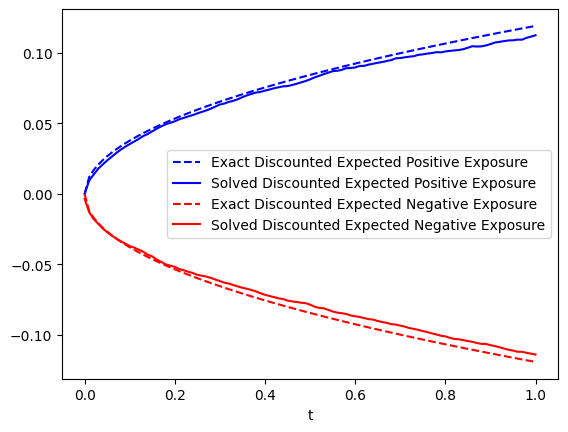

In [176]:
    fig = plt.figure()
    plt.plot(time_stamps,[0.0]+list(epe_exact),'b--',label='Exact Discounted Expected Positive Exposure')
    plt.plot(time_stamps,np.transpose(epe1),'b',label='Solved Discounted Expected Positive Exposure' )

    plt.plot(time_stamps,[0.0]+list(ene_exact),'r--',label='Exact Discounted Expected Negative Exposure')
    plt.plot(time_stamps,np.transpose(ene1),'r',label='Solved Discounted Expected Negative Exposure')

    plt.xlabel('t')
    plt.legend()

    plt.show()